# Menyelesaikan Permasalahan Institusi Pendidikan
- Nama: Dimas Dwi Armaisya
- Email: ddadims04@gmail.com
- Id Dicoding: ddadims04

# Business Understanding

Institusi pendidikan tinggi menghadapi tantangan signifikan terkait tingkat putus sekolah (dropout), mendaftar dan keberhasilan akademik mahasiswa. Tingginya angka dropout tidak hanya berdampak pada reputasi institusi tetapi juga pada sumber daya yang diinvestasikan dalam pendidikan mahasiswa. Dengan memahami faktor-faktor yang mempengaruhi keputusan mahasiswa untuk tetap melanjutkan atau menghentikan studi mereka, institusi dapat mengimplementasikan strategi yang lebih efektif untuk meningkatkan retensi dan keberhasilan akademik.

## Problem Statement

Meskipun institusi pendidikan tinggi menyediakan berbagai program studi, terdapat variasi signifikan dalam tingkat retensi dan keberhasilan akademik mahasiswa di berbagai program tersebut. Tingginya tingkat putus sekolah dan rendahnya kinerja akademik di beberapa program studi mengindikasikan adanya faktor-faktor yang belum sepenuhnya dipahami atau ditangani. Oleh karena itu, diperlukan model klasifikasi yang dapat memprediksi tingkat putus sekolah dan keberhasilan akademik mahasiswa berdasarkan data pendaftaran dan kinerja akademik awal mereka.

## Business Questions

Berdasarkan Business Understanding & Problem statement yang ada berikut ini adalah pertanyaan bisnis yang dapat dibuat:
1. Faktor apa saja yang paling signifikan mempengaruhi keputusan mahasiswa untuk dropout di institusi ini?
2. Seberapa akurat model klasifikasi dalam memprediksi dropout dan keberhasilan akademik mahasiswa?
3. Langkah-langkah apa yang dapat diambil oleh pihak institusi untuk menurunkan tingkat dropout berdasarkan prediksi model?

## Goals

Proyek ini bertujuan untuk Membangun dan mengimplementasikan model klasifikasi yang efektif untuk memprediksi tingkat putus sekolah dan keberhasilan akademik mahasiswa, sehingga institusi dapat mengambil tindakan proaktif untuk meningkatkan retensi dan kinerja akademik. tujuan proyek ini meliputi:
1. **Identifikasi Faktor Kunci**: Mengidentifikasi dan menganalisis faktor-faktor demografi, sosial-ekonomi, dan akademik yang paling berpengaruh terhadap keputusan dropout dan keberhasilan akademik mahasiswa.
2. **Pengembangan Model Prediksi**: Mengembangkan model klasifikasi dengan akurasi tinggi yang dapat memprediksi kemungkinan dropout dan tingkat keberhasilan akademik mahasiswa.


# Import Libraries

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


# Load Data & Data Understanding

In [3]:
#load datasets
base_path_hour = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'

df = pd.read_csv(base_path_hour, delimiter=';', on_bad_lines='skip')

# Menampilkan 5 baris data pertama
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print(f"the number of columns of the datasets: {df.shape[1]}")
print(f"the number of rows of the datasets: {df.shape[0]}")

the number of columns of the datasets: 37
the number of rows of the datasets: 4424


In [5]:
# Menampilkan informasi setiap kolom pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dataset yang digunakan dalam proyek ini adalah dataset yang bersumber dari github dengan tautan berikut: https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

Detail kolom dataset:

- **Marital status**: The marital status of the student.
-**Application mode**: The method of application used by the student.
- **Application order**: The order in which the student applied.
- **Course**: The course taken by the student.
- **Daytime/evening attendance**: Whether the student attends classes during the day or in the evening.
- **Previous qualification**: The qualification obtained by the student before enrolling in higher education.
-**Previous qualification (grade)**: Grade of previous qualification (between 0 and 200)
- **Nacionality**: The nationality of the student.
- **Mother's qualification**: The qualification of the student's mother.
- **Father's qualification**: The qualification of the student's father.
- **Mother's occupation**: The occupation of the student's mother.
- **Father's occupation**: The occupation of the student's father.
- **Admission grade**: Admission grade (between 0 and 200)
- **Displaced**: Whether the student is a displaced person.
- **Educational special needs**: Whether the student has any special educational needs.
- **Debtor**: Whether the student is a debtor.
- **Gender**: The gender of the student.
- **Scholarship holder**: Whether the student is a scholarship holder.
- **Age at enrollment**: The age of the student at the time of enrollment.
- **International**: Whether the student is an international student.
- **Curricular units 1st sem (credited)**: The number of curricular units credited by the student in the first semester.
- **Curricular units 1st sem (enrolled)**: The number of curricular units enrolled by the student in the first semester.
- **Curricular units 1st sem (evaluations)**: The number of curricular units evaluated by the student in the first semester.
- **Curricular units 1st sem (approved)**: The number of curricular units approved by the student in the first semester.

In [6]:
# Menampilkan informasi apakah data memiliki missing value
print(f"Data missing: {df.isnull().sum().sum()}")
df.isnull().sum()

Data missing: 0


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Pada Dataset yang dimiliki tidak ada indikasi missing value pada datanya sehingga kita bisa melanjutkan ke tahapan selanjutnya

In [7]:
# Mendeteksi Duplikasi Data
df.duplicated().sum()

0

Pada Dataset yang dimiliki juga tidak ada indikasi duplikasi data pada datanya sehingga kita bisa melanjutkan ke tahapan selanjutnya

#Data Preparation

In [8]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
df.describe(include='object')

,Status
count,4424
unique,3
top,Graduate
freq,2209


Sejauh ini, berdasarkan pengamatan statistik ringkasan dari kolom numerik menggunakan `.describe()` pada data yang dimiliki, tidak ada data yang anomali atau tidak normal yang teramati. Untuk data kategorikal (data target) memiliki 3 value unique, untuk itu kita bisa melakukan pemerikasaan data apakah data target imbalance atau tidak

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


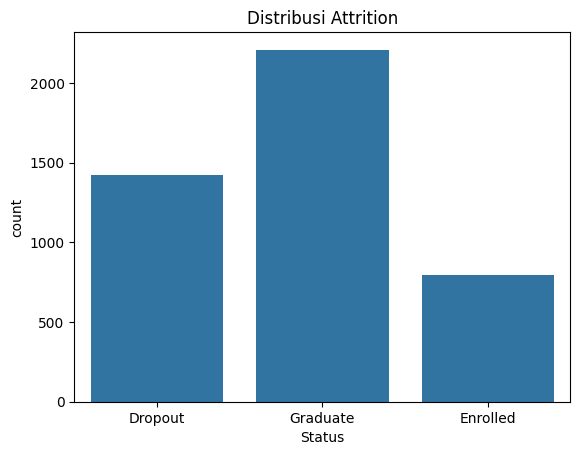

In [10]:
# Memeriksa distribusi target
print(df['Status'].value_counts())

# Visualisasi distribusi target
sns.countplot(x=df['Status'])
plt.title('Distribusi Attrition')
plt.show()

Dari hasil visualisasi yang diatas, dapat dilihat bahwa data target memiliki indikasi sedikit imbalance data pada data target yang kita miliki ini, untuk itu pada spliting data nantinya kita akan lakukan balancing data agar meningkatkan performa pada model yang akan dibuat nantinya

Selanjutnya kita ubah kolom target atau `Status` kedalam bentuk numerik agar dapat dilihat korelasi antar variabelnya dengan kolom target menggunakan `LabelEncoder()`

In [11]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah target menjadi label numerik
y_encoded = label_encoder.fit_transform(df['Status'])

# Mengonversi array numpy kembali ke DataFrame pandas
df['Status'] = pd.DataFrame(y_encoded, columns=['Status'])

print("Hasil Label Encode kolom target:")
df.head()

Hasil Label Encode kolom target:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


melihat korelasi antar fitur untuk nantinya bisa didapatkan sebuah insight untuk menentukan faktor-faktor apa saja yang berpengaruh pada kolom target

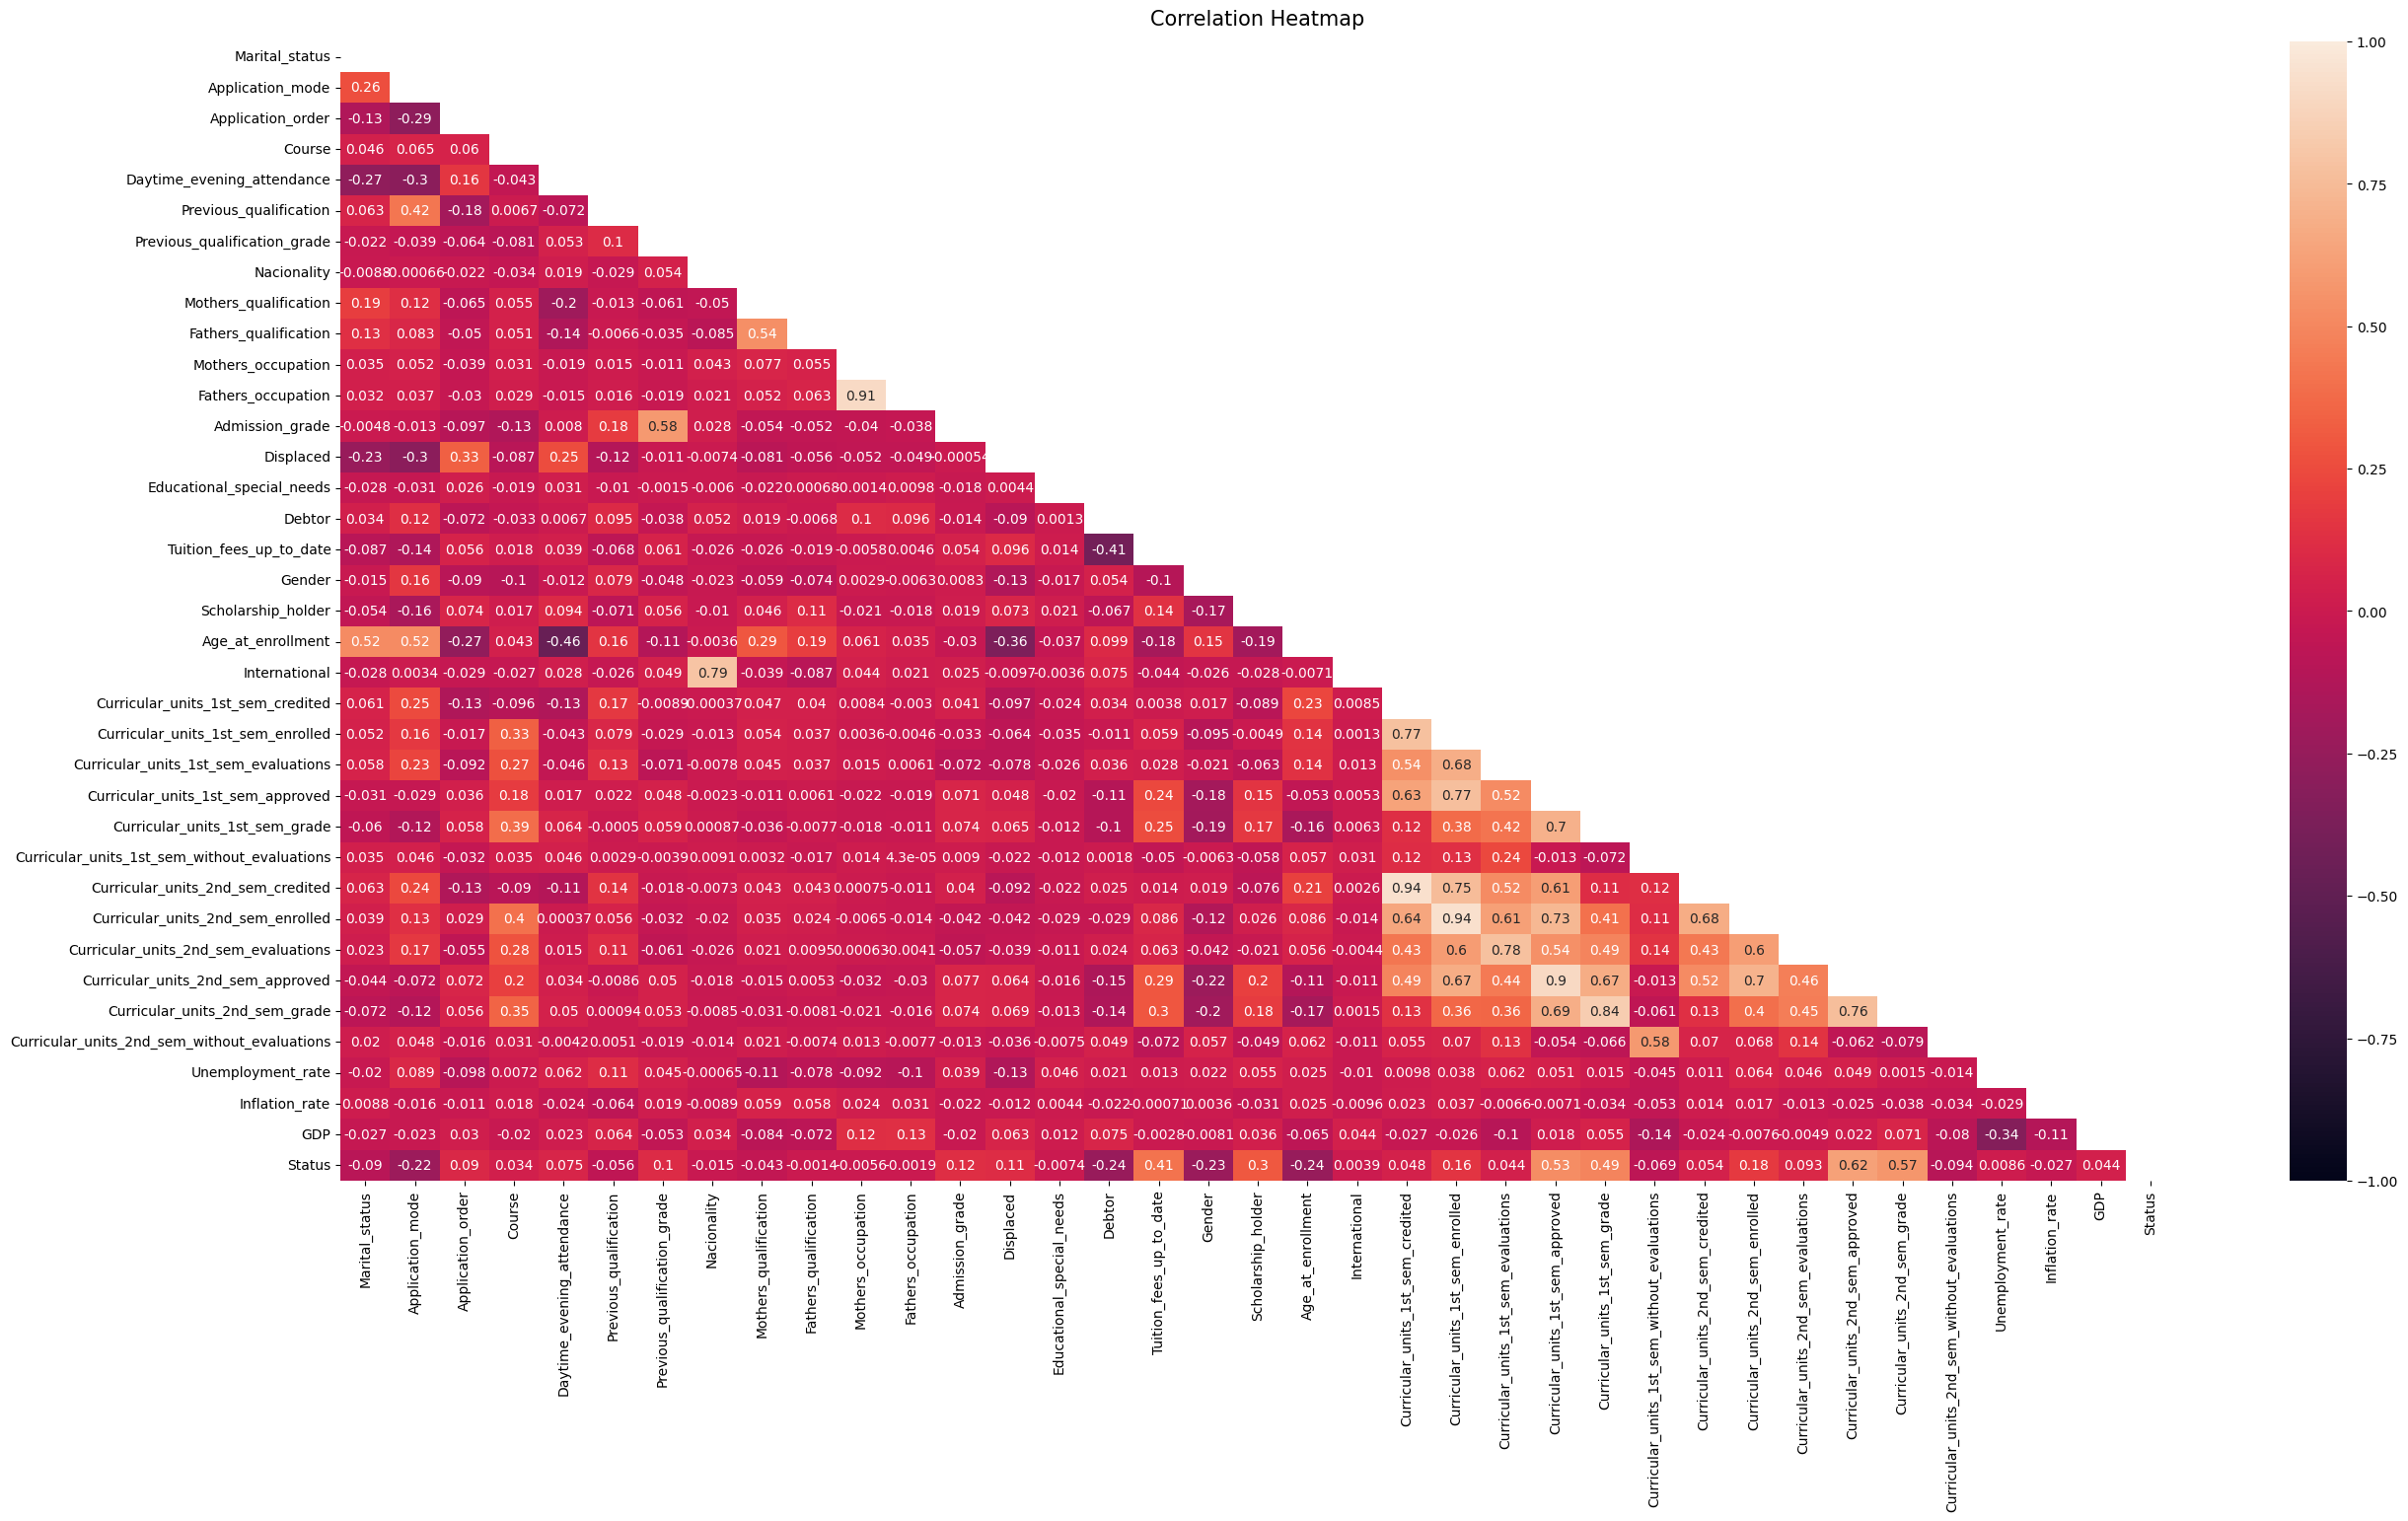

In [12]:
def corr_plot(df, metode):
  plt.figure(figsize=(30,15))
  triangle = np.triu(np.ones_like(df.corr(method = metode)))
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask = triangle)
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)
  return heatmap

numerical_cols = df.select_dtypes(include='number').columns
corr_plot(df[numerical_cols], "spearman");

Dari grafik heatmap diatas, fitur-fitur atau kolom berikut ini yang bisa menjadi kandidat penting dalam model karena memiliki skor korelasi yang cukup tinggi:

- `Curricular_units_2nd_sem_approved` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.62`.
- `Curricular_units_2nd_sem_grade` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.57`.
- `Curricular_units_1st_sem_approved` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.53`.
- `Curricular_units_1st_sem_grade` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.49`.
- `Tuition_fees_up_to_date` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.41`.
- `Scholarship_holder` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.3`.
- `Age_at_enrollment` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `-0.24`.
- `Gender` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `-0.23`.
- `Debtor` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `-0.24`.
- `Application_mode` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `-0.22`.
- `Curricular_units_2nd_sem_enrolled` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.18`.
- `Curricular_units_1st_sem_enrolled` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.16`.
- `Admission_grade` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.12`.
- `Displaced` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.11`.
- `Previous_qualification_grade` karena memiliki korelasi yang cukup tinggi dengan kolom target `Status` yaitu sekitar `0.1`.

Kolom diatas adalah fitur-fitur yang akan kita gunakan untuk pemodelan klasifikasi memprediksi dropout dan keberhasilan akademik mahasiswa


In [13]:
# Memisahkan fitur (X) dan target (y) dengan fitur (X) yang sudah ditetapkan sebelumnya
feature_x= ['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Previous_qualification_grade',
            'Admission_grade', 'Displaced', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
            'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']
X = df[feature_x]
y = df['Status']

# Inisialisasi StandardScaler untuk standarisasi data numerikal
scaler = StandardScaler()

#   Menerapkan scaling pada kolom numerikal
X_scaled = scaler.fit_transform(X)

# Mengonversi array numpy kembali ke DataFrame pandas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Hasil scaling kolom numerikal:")
X_scaled.head()

Hasil scaling kolom numerikal:


,Application_mode,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Previous_qualification_grade,Admission_grade,Displaced,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
0,-0.095470,-0.358167,0.368135,1.357640,-0.574914,-0.430363,-0.804841,0.022229,0.907512,-2.528560,-1.521257,-2.197102,-2.838337,-1.471527,-1.963489
1,-0.209869,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,2.076819,1.071926,0.907512,-0.109105,0.418050,0.693599,-0.105726,0.518904,0.659562
2,-1.010660,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.804841,-0.150419,0.907512,-0.109105,-1.521257,-2.197102,-0.105726,-1.471527,-1.963489
3,-0.095470,-0.358167,0.368135,-0.736572,-0.574914,-0.430363,-0.804841,-0.509526,0.907512,-0.109105,0.418050,0.575611,-0.105726,0.187165,0.416450
4,1.162916,-0.358167,0.368135,-0.736572,-0.574914,2.864765,-2.473171,1.002867,-1.101914,-0.109105,0.094832,0.349468,-0.105726,0.518904,0.531608


In [14]:
# Memisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Menggunakan SMOTE pada data training untuk menangani imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Distribusi target setelah oversampling:")
print(pd.Series(y_res).value_counts())

Distribusi target setelah oversampling:
Status
2    1546
0    1546
1    1546
Name: count, dtype: int64


#Modeling

###Logistic Regression

Parameter yang digunakan:

- random_state = 42: Digunakan untuk memastikan hasil model dapat direproduksi dengan memberikan seed yang tetap.
- max_iter = melakukan iterasi dengan maksimal iterasi sebanyak 1000

Dalam implementasi ini, **`LogisticRegression()`** menggunakan semua parameter default dengan penyetelan khusus `random_state` dan `max_iter`. Hasil model diukur dengan menggunakan akurasi train dan test serta confusion matriks.

In [15]:
# Inisialisasi model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Melatih model
log_reg.fit(X_res, y_res)

# Prediksi
y_pred_test_lr = log_reg.predict(X_test)
y_pred_train_lr = log_reg.predict(X_res)

# Evaluasi
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_res)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_test_lr))
print(classification_report(y_test, y_pred_test_lr))

Logistic Regression - accuracy_train: 0.7238033635187581
Logistic Regression - accuracy_test: 0.7349397590361446
Logistic Regression:
[[293  95  39]
 [ 40 148  50]
 [ 16 112 535]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       427
           1       0.42      0.62      0.50       238
           2       0.86      0.81      0.83       663

    accuracy                           0.73      1328
   macro avg       0.70      0.70      0.70      1328
weighted avg       0.77      0.73      0.75      1328



###Decision Tree Classifier

Parameter yang digunakan:

- random_state = 42: Digunakan untuk memastikan hasil model dapat direproduksi dengan memberikan seed yang tetap.

Dalam implementasi ini, **`DecisionTreeClassifier()`** menggunakan semua parameter default dan penyetelan khusus pada `random_state`. Hasil model diukur dengan menggunakan akurasi train dan test serta confusion matriks.

In [16]:
# Inisialisasi model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_classifier.fit(X_res, y_res)

# Prediksi
y_pred_test_dtc = dt_classifier.predict(X_test)
y_pred_train_dtc = dt_classifier.predict(X_res)

# Evaluasi
accuracy_train_dtc = accuracy_score(y_pred_train_dtc, y_res)
accuracy_test_dtc = accuracy_score(y_pred_test_dtc, y_test)

print('Decision Tree Classifier - accuracy_train:', accuracy_train_dtc)
print('Decision Tree Classifier - accuracy_test:', accuracy_test_dtc)
print("Decision Tree Classifier:")
print(confusion_matrix(y_test, y_pred_test_dtc))
print(classification_report(y_test, y_pred_test_dtc))

Decision Tree Classifier - accuracy_train: 1.0
Decision Tree Classifier - accuracy_test: 0.6807228915662651
Decision Tree Classifier:
[[304  69  54]
 [ 66  98  74]
 [ 72  89 502]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       427
           1       0.38      0.41      0.40       238
           2       0.80      0.76      0.78       663

    accuracy                           0.68      1328
   macro avg       0.62      0.63      0.62      1328
weighted avg       0.69      0.68      0.68      1328



###SVM

Parameter yang digunakan:

- random_state = 42: Digunakan untuk memastikan hasil model dapat direproduksi dengan memberikan seed yang tetap.
- probability = True: digunakan untuk parameter yang dipelajari dalam
Penskalaan Platt untuk menghasilkan estimasi probabilitas dari nilai keputusan.

Dalam implementasi ini, **`SVM()`** menggunakan semua parameter default dan penyetelan khusus pada `random_state` dan `probability`. Hasil model diukur dengan menggunakan akurasi train dan test serta confusion matriks.

In [17]:
# Inisialisasi model
svm_classifier = SVC(random_state=42, probability=True)

# Melatih model
svm_classifier.fit(X_res, y_res)

# Prediksi
y_pred_test_svm = svm_classifier.predict(X_test)
y_pred_train_svm = svm_classifier.predict(X_res)

# Evaluasi
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_res)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)
print("SVM:")
print(confusion_matrix(y_test, y_pred_test_svm))
print(classification_report(y_test, y_pred_test_svm))

SVM - accuracy_train: 0.7861147046140577
SVM - accuracy_test: 0.7108433734939759
SVM:
[[282 103  42]
 [ 46 140  52]
 [ 19 122 522]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       427
           1       0.38      0.59      0.46       238
           2       0.85      0.79      0.82       663

    accuracy                           0.71      1328
   macro avg       0.68      0.68      0.67      1328
weighted avg       0.75      0.71      0.73      1328



###Random Forest Classifier

Parameter yang digunakan:

- random_state = 42: Digunakan untuk memastikan hasil model dapat direproduksi dengan memberikan seed yang tetap.

Dalam implementasi ini, **`RandomForestClassifier()`** menggunakan semua parameter default dan penyetelan khusus pada `random_state`. Hasil model diukur dengan menggunakan akurasi train dan test serta confusion matriks.

In [18]:
# Inisialisasi model
rf_classifier = RandomForestClassifier(random_state=42)

# Melatih model
rf_classifier.fit(X_res, y_res)

# Prediksi
y_pred_test_rfc = rf_classifier.predict(X_test)
y_pred_train_rfc = rf_classifier.predict(X_res)

# Evaluasi
accuracy_train_rfc = accuracy_score(y_pred_train_rfc, y_res)
accuracy_test_rfc = accuracy_score(y_pred_test_rfc, y_test)

print('Random Forest Classifier - accuracy_train:', accuracy_train_rfc)
print('Random Forest Classifier - accuracy_test:', accuracy_test_rfc)
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_test_rfc))
print(classification_report(y_test, y_pred_test_rfc))

Random Forest Classifier - accuracy_train: 1.0
Random Forest Classifier - accuracy_test: 0.7695783132530121
Random Forest Classifier:
[[320  57  50]
 [ 63 108  67]
 [ 13  56 594]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       427
           1       0.49      0.45      0.47       238
           2       0.84      0.90      0.86       663

    accuracy                           0.77      1328
   macro avg       0.71      0.70      0.70      1328
weighted avg       0.76      0.77      0.77      1328



#### Hyperparameter Tuning Using Random Forest Classifier

Pada tahapan hyperparameter tuning ini kita mencari kombinasi parameter yang paling optimal untuk model machine learning yang kita guna meningkatkan performanya. Pada tahapan ini kita mencoba mencari parameter yang cocok dengan parameter yang dituning adalah `n_estimators` (50, 100, 200), `max_depth` (10, 20, None), `min_sample_split` (2, 5, 10), `max_features` (None, sqrt, log2)

In [19]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Accuracy:", grid_search.best_score_)

Best Random Forest Accuracy: 0.763888888888889


## Finding Feature Importance

Mencari fitur mana yang paling penting untuk menunjukkan atau menentukan seberapa besar pengaruh atau kontribusi setiap fitur (variabel independen) dalam menentukan prediksi model.

In [20]:
# Melihat feature importance menggunakan Random Forest Classifier
feature_importance = pd.DataFrame({
    'Feature': X_res.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                              Feature  Importance
13  Curricular_units_2nd_sem_approved    0.163277
14     Curricular_units_2nd_sem_grade    0.126159
10  Curricular_units_1st_sem_approved    0.118754
11     Curricular_units_1st_sem_grade    0.098678
7                     Admission_grade    0.081595
6        Previous_qualification_grade    0.074628
5                   Age_at_enrollment    0.071911
12  Curricular_units_2nd_sem_enrolled    0.049089
9   Curricular_units_1st_sem_enrolled    0.048866
0                    Application_mode    0.046834
2             Tuition_fees_up_to_date    0.045582
4                  Scholarship_holder    0.025445
3                              Gender    0.018166
8                           Displaced    0.017532
1                              Debtor    0.013485


Dapat dilihat top 3 feature importancenya yaitu kolom `Curricular_units_2nd_sem_approved`, `Curricular_units_2nd_sem_grade`, dan `Curricular_units_1st_sem_approved`

## Neural Network

Disini saya mencoba untuk menggunakan pemodelan neural network karna hasil dari beberapa model machine learning yang dilatih itu akurasi yang paling bagus hanya sebesar 76%, untuk itu saya mencoba dengan menggunakan neural network

In [21]:
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))

# Output layer (3 classes for Dropout, Graduate, Enrolled)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5930 - loss: 0.9476 - val_accuracy: 0.7011 - val_loss: 0.7655
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.7439 - val_accuracy: 0.7176 - val_loss: 0.6813
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7182 - loss: 0.6713 - val_accuracy: 0.7380 - val_loss: 0.6505
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7481 - loss: 0.6329 - val_accuracy: 0.7470 - val_loss: 0.6342
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7594 - loss: 0.5993 - val_accuracy: 0.7523 - val_loss: 0.6290
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7565 - loss: 0.6036 - val_accuracy: 0.7545 - val_loss: 0.6217
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7713 - loss: 0.5709 - val_accuracy: 0.7636 - val_loss: 0.6189
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 0.5625 - val_accuracy: 0.7673 - val_loss

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7795 - loss: 0.5714
Test Accuracy: 0.7658132314682007


Ternyata hasil yang didapat juga tidak begitu bagus, dengan hasil akurasi test yang didapat hanya sebesar 74% saja

# Insight Model

1. **Kelas yang Sulit Diprediksi**:
Kelas 1 (Enrolled) memiliki nilai precision dan recall yang lebih rendah dibandingkan kelas lainnya. Ini menunjukkan bahwa model kesulitan untuk memprediksi siswa yang terdaftar.

2. **Feature Importance**:
Beberapa fitur yang paling berpengaruh pada model Random Forest (model terbaik) adalah: **`Curricular_units_2nd_sem_approved (16.33%)`**, **`Curricular_units_2nd_sem_grade (12.62%)`**, **`Curricular_units_1st_sem_approved (11.88%)`**
Hal ini menunjukkan pentingnya pelacakan dan nilai dari unit kurikulum yang diambil siswa untuk menentukan status mereka.

3. **Model Terbaik untuk Deployment**: **`Random Forest Classifier`** tampaknya menjadi model yang paling menjanjikan untuk digunakan lebih lanjut, dengan akurasi test 76.96% dan F1-score tertinggi untuk kelas 2 (0.86). Meskipun model ini mengalami overfitting (akurasi train 100%), hasil akurasi test yang tinggi dan performa F1-score menunjukkan bahwa model ini dapat menghasilkan prediksi yang baik untuk kelas 2 (Graduate).

# Saved Model

In [24]:
# Simpan model Random Forest
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Conclusion

Tujuan utama proyek ini adalah membangun model klasifikasi untuk memprediksi dropout, terdaftar dan keberhasilan akademik mahasiswa berdasarkan data demografi dan kinerja awal mereka. Berdasarkan hasil dari beberapa model, seperti Random Forest, Logistic Regression, Decision Tree, dan Neural Networks, kita telah mencapai pemodelan yang cukup baik dengan akurasi yang bervariasi. Hasil terbaik dicapai oleh model **Random Forest Classifier** dengan akurasi test sebesar **76.96%** dan **Neural Networks** dengan akurasi **74.02%**, yang menunjukkan bahwa model dapat memprediksi dropout, terdaftar dan keberhasilan akademik mahasiswa dengan cukup baik. Dengan faktor-faktor yang paling berpengaruh terhadap prediksi dropout, terdaftar dan keberhasilan akademik adalah `Curricular_units_2nd_sem_approved`, `Curricular_units_2nd_sem_grade`, `Curricular_units_1st_sem_approved`, `Curricular_units_1st_sem_grade`, dan `Admission_grade`. Faktor-faktor ini menunjukkan pentingnya performa akademik di semester awal dalam menentukan keberhasilan, terdaftar ataupun dropout.